In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from optimizer import *
from LookAhead import LookAheadOpt

In [2]:
def rosen(x, a=1, b=5):
    n = len(x)
    return sum((a - x[i])**2 + b*(x[i+1]- x[i]**2)**2 for i in range(n-1))

In [3]:
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x, y)
P = np.stack([X,Y])
Z = rosen(P)

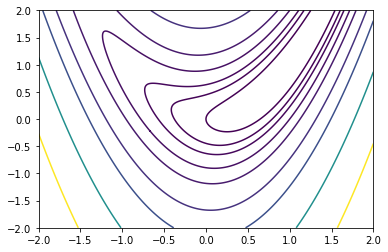

In [4]:
plt.contour(X, Y, Z, [1, 2, 3, 5, 8, 15, 25, 50, 100])

In [7]:
adam = AdamOpt(2)
momentum = MomemtumOpt(2)
gradient_descent = gradient_descent_methods()
conjugate_gradient = conjugate_gradient_methods(2)

def h(x):
    return np.array([np.sum(x) - 2])

augmented_lagrange = AugumentedLagrangeOpt(h, 1)

In [8]:
lookahead_adam = LookAheadOpt(adam)
lookahead_mom = LookAheadOpt(momentum)
lookahead_gd = LookAheadOpt(gradient_descent)
lookahead_cg = LookAheadOpt(conjugate_gradient)
lookahead_al = LookAheadOpt(augmented_lagrange)

In [9]:
def generate_random(low, high):
    return np.random.random() * (high - low) + low

In [10]:
init_x = np.array([generate_random(-2, 2), generate_random(-2, 2)])

In [11]:
def process(opt, func, x, k=2000):
    p = np.zeros((k+1,2))
    p[0] = x
    
    for i in range(k):
        x = opt.step(func, x)
        p[i+1] = x
    
    return p

In [12]:
x_adam = process(adam, rosen, init_x)
x_mom = process(momentum, rosen, init_x)
x_grad = process(gradient_descent, rosen, init_x)
x_cg = process(conjugate_gradient, rosen, init_x)
x_aug = process(augmented_lagrange, rosen, init_x)

In [13]:
x_la_adam = process(lookahead_adam, rosen, init_x)
x_la_mom = process(lookahead_mom, rosen, init_x)
x_la_gd = process(lookahead_gd, rosen, init_x)
x_la_cg = process(lookahead_cg, rosen, init_x)
x_la_aug = process(lookahead_al, rosen, init_x)

In [14]:
def generatePlot(BaseOptRes, LookaheadOptRes):
    fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
    plt.contour(X, Y, Z, [1, 2, 3, 5, 8, 15, 25, 50, 100])
    plt.plot(BaseOptRes[:,0], BaseOptRes[:,1], linewidth=3, color='green', alpha=0.8)
    plt.plot(LookaheadOptRes[:,0], LookaheadOptRes[:,1], linewidth=3, color='red', alpha=0.8)

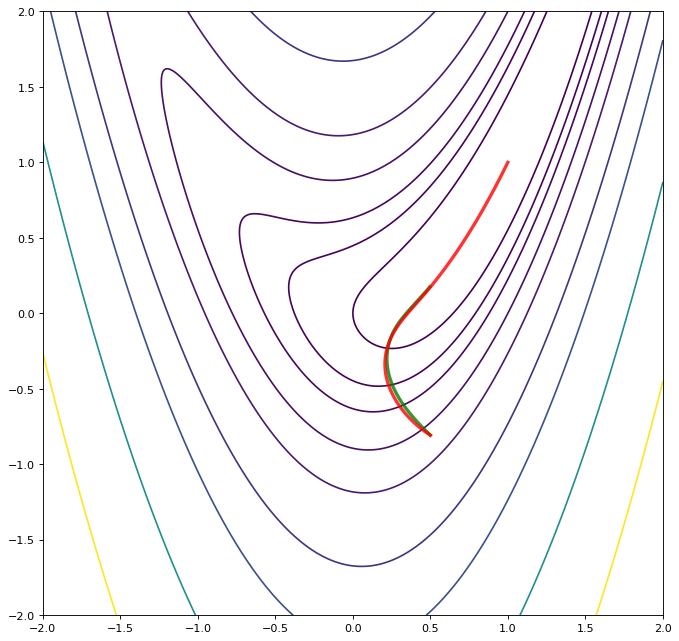

In [15]:
generatePlot(x_adam, x_la_adam)

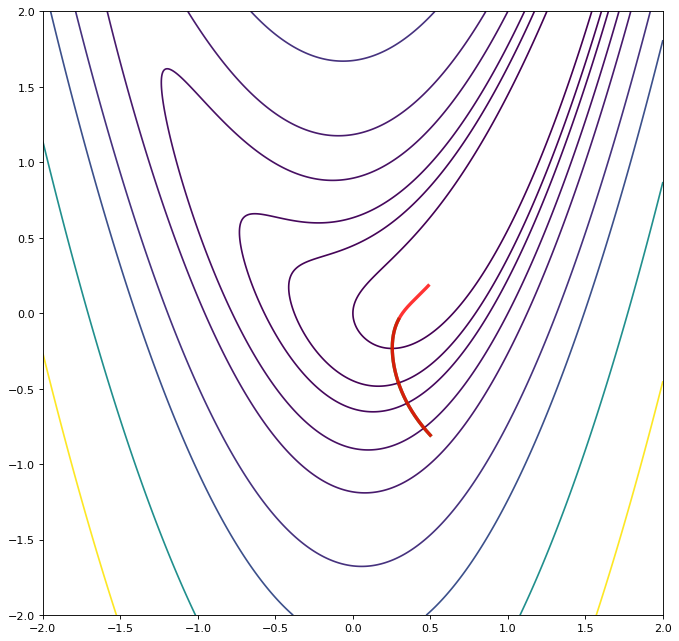

In [16]:
generatePlot(x_mom, x_la_mom)

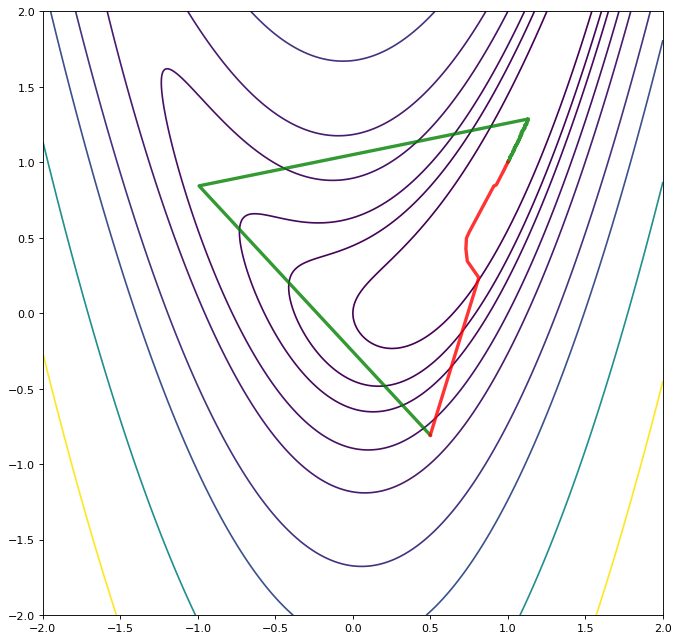

In [17]:
generatePlot(x_grad, x_la_gd)

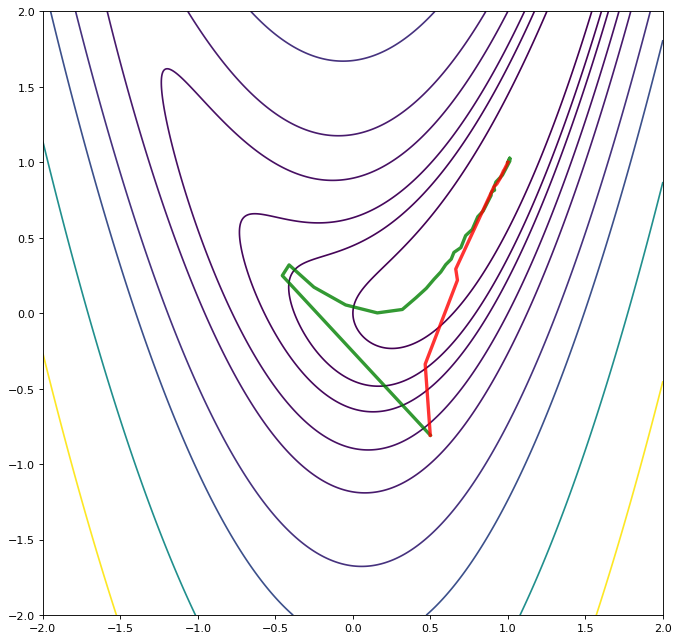

In [18]:
generatePlot(x_cg, x_la_cg)

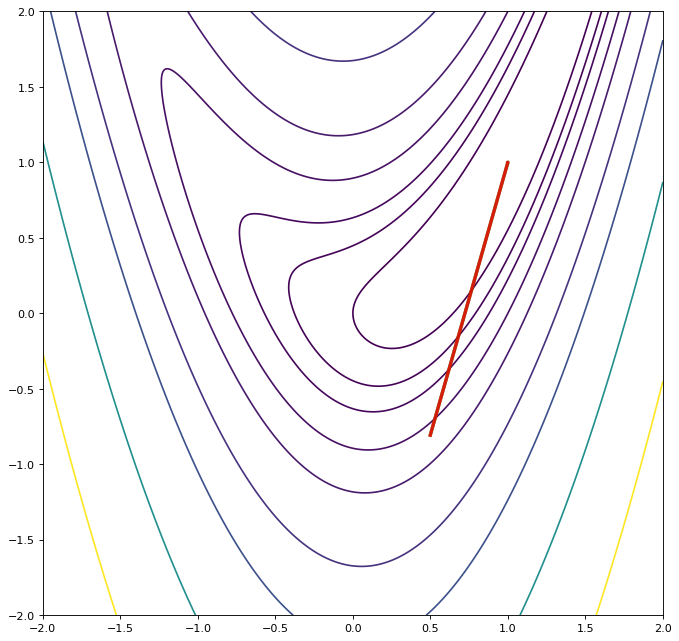

In [19]:
generatePlot(x_aug, x_la_aug)

In [ ]:
def flower(x, a=1, b=1, c=4):
    n = len(x)
    return sum(a * np.linalg.norm(x[i:i+2], axis=0) + b * np.sin(c * np.arctan2(x[i+1], x[i])) for i in range(n-1))

In [ ]:
Z_flower = flower(P)

In [ ]:
plt.contour(X, Y, Z_flower)

In [ ]:
init_x = np.array([generate_random(-2, 2), generate_random(-2, 2)])

In [ ]:
x_adam = process(adam, flower, init_x)
x_mom = process(momentum, flower, init_x)

In [ ]:
x_la_adam = process(lookahead_adam, flower, init_x)
x_la_mom = process(lookahead_mom, flower, init_x)

In [ ]:
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.contour(X, Y, Z_flower, [1, 2, 3, 5, 8, 15, 25, 50, 100])
plt.plot(x_adam[:,0], x_adam[:,1], linewidth=3)
plt.plot(x_la_adam[:,0], x_la_adam[:,1], color='r', alpha=0.8)

In [ ]:
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.contour(X, Y, Z_flower, [1, 2, 3, 5, 8, 15, 25, 50, 100])
plt.plot(x_mom[:,0], x_mom[:,1], linewidth=3)
plt.plot(x_la_mom[:,0], x_la_mom[:,1], color='r', alpha=0.8)